# replicate Figure 5

https://github.com/hmamaysky/Energy/blob/master/Analysis/oos_energy.py

generates Figure 6

In [1]:
import pickle
with open('forward_models/var_coef_1vars_forward.p', 'rb') as file:
    var_coef_dict = pickle.load(file)

In [3]:
var_coef_dict['DOilVol']

,2003-04-25,2003-05-02,2003-05-09,2003-05-16,2003-05-23,2003-05-30,2003-06-06,2003-06-13,2003-06-20,2003-06-27,...,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,2020-03-20,2020-03-27
Constant,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOilVol,-0.102023,-0.105017,-0.087089,-0.062955,-0.032189,-0.032975,-0.048897,-0.044111,-0.036954,-0.030784,...,0.039072,0.036378,0.033144,0.030338,0.026847,0.025355,0.027438,0.024034,0.017614,0.022257
OilVol,-0.690622,-0.694197,-0.707100,-0.710932,-0.707424,-0.716031,-0.721593,-0.727544,-0.737304,-0.730768,...,-0.627109,-0.625285,-0.626512,-0.627142,-0.629630,-0.632533,-0.637204,-0.659248,-0.687424,-0.716164


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



import pandas as pd
from OOSfuncs import data_set

In [2]:
pd.read_excel('forward_models/Lasso_10fold_8wk1vars_forward.xlsx', index_col=0)

,FutRet,xomRet,bpRet,rdsaRet,DSpot,DOilVol,DInv,DProd
Constant,13.937549,7.913096,10.530635,9.585772,15.143156,14.594566,1.848200,3.331014
Forward Model,14.359436,7.974742,10.595043,9.696877,15.452190,14.851983,1.838584,3.377682


In [3]:
pd.read_excel('forward_models/Lasso_10fold_8wk7vars_forward.xlsx', index_col=0)

,FutRet,xomRet,bpRet,rdsaRet,DSpot,DOilVol,DInv,DProd
Constant,13.937549,7.913096,10.530635,9.585772,15.143156,14.594566,1.848200,3.331014
Forward Model,15.650146,8.182431,11.232390,9.983437,16.901542,13.630102,1.842971,3.467305


In [4]:
pd.read_excel('forward_models/Lasso_10fold_8wk6vars_forward.xlsx', index_col=0)

,FutRet,xomRet,bpRet,rdsaRet,DSpot,DOilVol,DInv,DProd
Constant,13.937549,7.913096,10.530635,9.585772,15.143156,14.594566,1.848200,3.331014
Forward Model,15.667233,8.181715,11.170165,9.865876,16.943970,13.155123,1.850439,3.483700


In [5]:
pd.read_excel('forward_models/Lasso_10fold_8wk5vars_forward.xlsx', index_col=0)

,FutRet,xomRet,bpRet,rdsaRet,DSpot,DOilVol,DInv,DProd
Constant,13.937549,7.913096,10.530635,9.585772,15.143156,14.594566,1.848200,3.331014
Forward Model,15.555451,8.188387,10.964623,9.830163,17.201554,13.206634,1.869873,3.421845


In [6]:
def get_test_week_list(d_var, updating_window=5, frequency=1):
    time_col = data_set(d_var)['date'] 
    test_week_list = [time for time in time_col if time>=time_col[0]+pd.Timedelta(str(7*updating_window*52)+'days')][::frequency]
    return test_week_list
    
def plot_RMSE(d_var, no_variables, ax=None):
    df = pd.read_excel(f'forward_models/Lasso_10fold_8wk{no_variables}vars_forward_rmses.xlsx', index_col=0)
    df.index = get_test_week_list(d_var)
    if not ax:
        fig, ax = plt.subplots(figsize=(18,6))
    df.loc[:,df.columns.str.startswith(d_var)].plot(ax=ax)
    ax.set_yscale('log')
    if no_variables == 1:
        ax.set_title(f'Cumulative RMSE of predicting {d_var} with top {no_variables} variable')
    else:
        ax.set_title(f'Cumulative RMSE of predicting {d_var} with top {no_variables} variables')

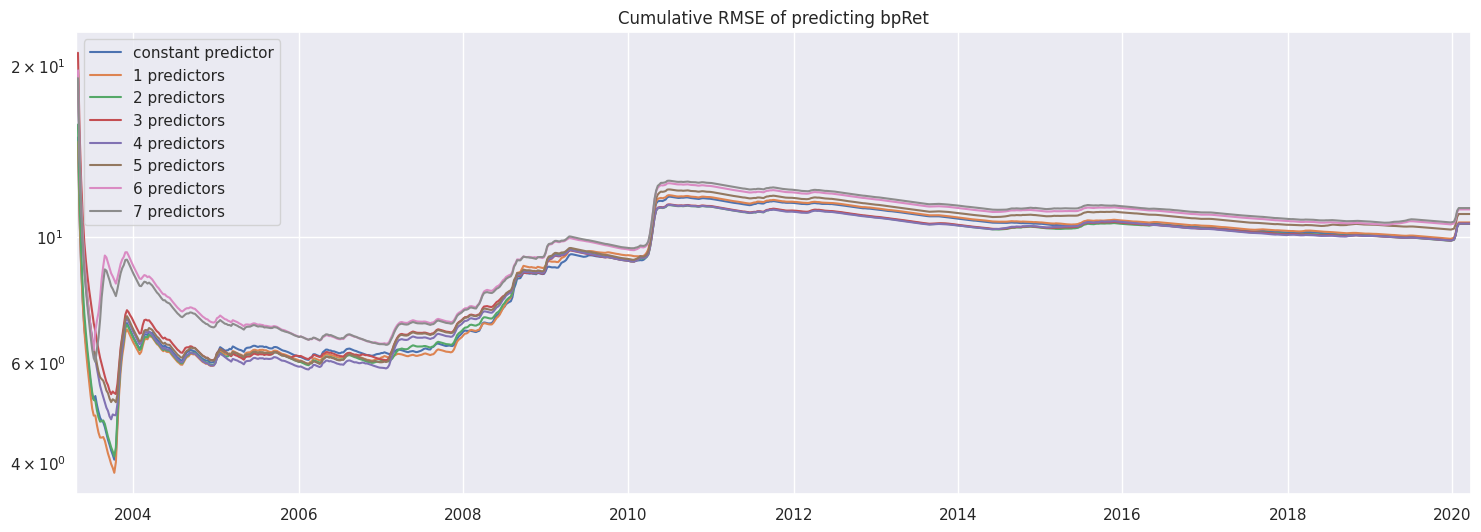

In [9]:
d_var = 'bpRet'

no_variables_list = range(1,8)
fig, ax = plt.subplots(figsize=(18,6))
plot_RMSE(f'{d_var}_constant', 1, ax=ax)
for no_variables in no_variables_list:
    plot_RMSE(f'{d_var}_forward', no_variables, ax=ax)
ax.set_title(f'Cumulative RMSE of predicting {d_var}')
ax.legend(['constant predictor']+[f'{no_variables} predictors' for no_variables in no_variables_list]);